In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("saAccident2013_csv.csv",index_col=None)
df2 = pd.read_csv("saAccident2014_csv.csv",index_col=None)
df3 = pd.read_csv("saAccident2015_csv.csv",index_col=None)
df4 = pd.read_csv("saAccident2016_csv.csv",index_col=None)

In [3]:
df['Year']=2013
df2['Year']=2014
df3['Year']=2015
df4['Year']=2016

In [4]:
frames = [df,df2,df3,df4]

In [5]:
result = pd.concat(frames)

In [23]:
result[result['Year']==2013].count()

Crash                                34764
Crash Date                           34764
Crash Time                           34764
Crash Alcohol Factor Flag            34764
Crash Latitude                       34764
Crash Longitude                      34764
Reported Road                        34764
Reported Intersecting Road           34764
Crash Contributing Factor List       34764
Fatal Crashes                        34764
Incapacitating Injury Crashes        34764
Non-Incapacitating Injury Crashes    34764
Possible Injury Crashes              34764
Non-Injury Crashes                   34764
Unknown Injury Crashes               34764
Total Crashes                        34764
Year                                 34764
dtype: int64

In [8]:
totalByYear = result.groupby('Year').size()

In [10]:
totalByYear

Year
2013    34764
2014    37328
2015    42473
2016    46112
dtype: int64

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates

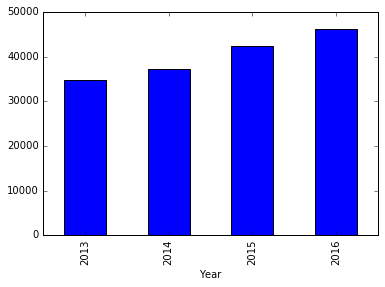

In [9]:
totalByYear.plot(kind='bar');

In [29]:
result.columns

Index([u'Crash', u'Crash Date', u'Crash Time', u'Crash Alcohol Factor Flag',
       u'Crash Latitude', u'Crash Longitude', u'Reported Road',
       u'Reported Intersecting Road', u'Crash Contributing Factor List',
       u'Fatal Crashes', u'Incapacitating Injury Crashes',
       u'Non-Incapacitating Injury Crashes', u'Possible Injury Crashes',
       u'Non-Injury Crashes', u'Unknown Injury Crashes', u'Total Crashes',
       u'Year'],
      dtype='object')

In [7]:
# how many alcohol-related accidents per year
result[result['Crash Alcohol Factor Flag']=='Yes'].groupby('Year').size()

Year
2013    1994
2014    1807
2015    1964
2016    1788
dtype: int64

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [12]:
# looks like some lat/lon not records...how many in 2016?
df4[df4['Crash Longitude']==0].count()

Crash                                447
Crash Date                           447
Crash Time                           447
Crash Alcohol Factor Flag            447
Crash Latitude                       447
Crash Longitude                      447
Reported Road                        447
Reported Intersecting Road           447
Crash Contributing Factor List       447
Fatal Crashes                        447
Incapacitating Injury Crashes        447
Non-Incapacitating Injury Crashes    447
Possible Injury Crashes              447
Non-Injury Crashes                   447
Unknown Injury Crashes               447
Total Crashes                        447
Year                                 447
dtype: int64

In [6]:
# create dataframe for 2016 where Longtitude/Lat exist
df16 = df4[df4['Crash Longitude'] != 0]

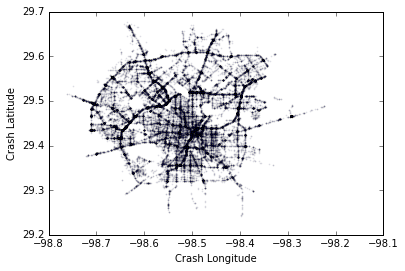

In [24]:
# where do accidents occur -- the darker, the more prevalent
df16.plot(kind='scatter', x='Crash Longitude',y='Crash Latitude', marker='o', alpha=0.1, s=.5);

In [25]:
# let's plot for all years & compare, first remove all unrecorded lat/lot
df13 = df[df['Crash Longitude'] != 0]
df14 = df2[df2['Crash Longitude'] != 0]
df15 = df3[df3['Crash Longitude'] != 0]

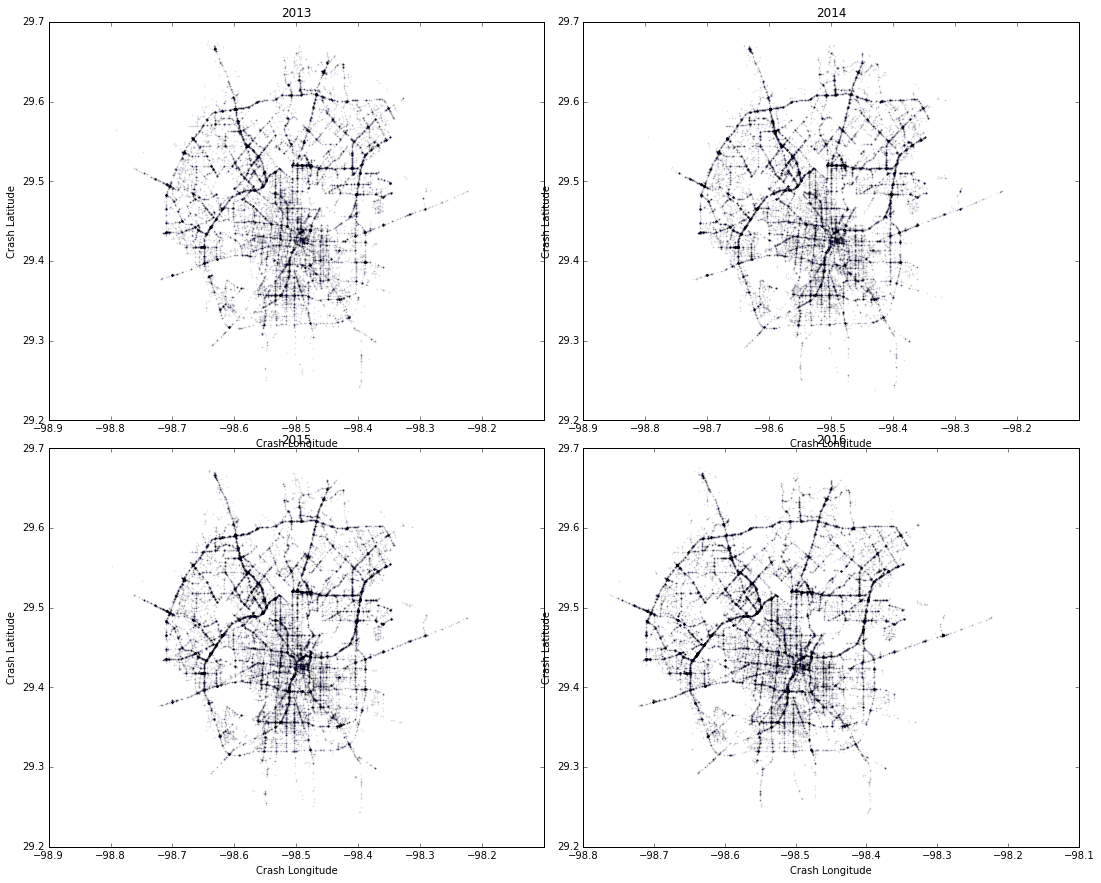

In [32]:
# plot years together, what gets increasingly darker?
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,12))
fig.tight_layout()

df13.plot(kind='scatter', x='Crash Longitude',y='Crash Latitude', title = "2013", marker='o', alpha=0.1, s=.5, ax=axes[0,0]);
df14.plot(kind='scatter', x='Crash Longitude',y='Crash Latitude', title = "2014", marker='o', alpha=0.1, s=.5, ax=axes[0,1]);
df15.plot(kind='scatter', x='Crash Longitude',y='Crash Latitude', title = "2015", marker='o', alpha=0.1, s=.5, ax=axes[1,0]);
df16.plot(kind='scatter', x='Crash Longitude',y='Crash Latitude', title = "2016", marker='o', alpha=0.1, s=.5, ax=axes[1,1]);

In [39]:
result['CrashTime24'] = result['Crash Time'].apply(lambda x: x+12 if x > 12 else x)

In [108]:
import time
import datetime

In [109]:
fs="%I:%M %p"
result['dateTime'] = result['Crash Time'].map(lambda x: time.strptime(x,fs))
isinstance(result['dateTime'], datetime.datetime)


False

In [82]:
result['dateTime'] = result['Crash Time'].map(lambda x: time.strptime(x,fs))

In [116]:
result['dateTime'].describe()

count                               160677
unique                                1440
top       (1900, 1, 1, 17, 0, 0, 0, 1, -1)
freq                                  1404
Name: dateTime, dtype: object

AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [81]:
isinstance(result['dateTime'], datetime.datetime)

False

In [20]:
# top reasons for accidents in 2016
df16.groupby('Crash Contributing Factor List').size().order(ascending=False)

/Users/rachelrinaldi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


Crash Contributing Factor List
DRIVER INATTENTION                                                                                                                             7385
DRIVER INATTENTION; FOLLOWED TOO CLOSELY                                                                                                       2258
NONE                                                                                                                                           2192
FOLLOWED TOO CLOSELY                                                                                                                           1856
FAILED TO CONTROL SPEED                                                                                                                        1688
CHANGED LANE WHEN UNSAFE                                                                                                                       1570
DRIVER INATTENTION; FAILED TO CONTROL SPEED                                      

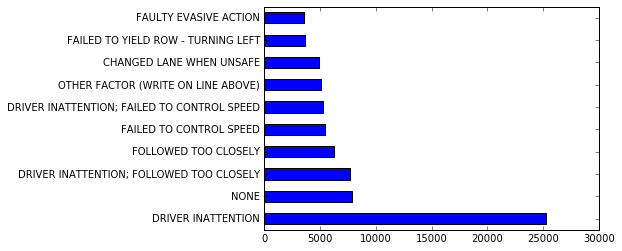

In [22]:
# how does that differ across all years?
result['Crash Contributing Factor List'].value_counts()[:10].plot(kind='barh')

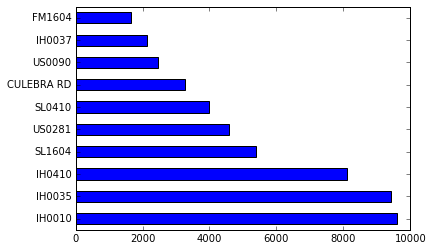

In [93]:
result['Reported Road'].value_counts()[:10].plot(kind='barh')

In [7]:
culebra = df16[df16['Reported Road']=='CULEBRA RD']

In [8]:
culebra

,Crash,Crash Date,Crash Time,Crash Alcohol Factor Flag,Crash Latitude,Crash Longitude,Reported Road,Reported Intersecting Road,Crash Contributing Factor List,Fatal Crashes,Incapacitating Injury Crashes,Non-Incapacitating Injury Crashes,Possible Injury Crashes,Non-Injury Crashes,Unknown Injury Crashes,Total Crashes,Year
97,14839755,01/01/2016,8:43 PM,No,29.478680,-98.664432,CULEBRA RD,ENSENADA,CHANGED LANE WHEN UNSAFE; FAULTY EVASIVE ACTIO...,0,0,0,1,0,0,1,2016
234,14840545,01/02/2016,3:38 PM,No,29.450050,-98.579148,CULEBRA RD,ALICIA,FAILED TO YIELD ROW - PRIVATE DRIVE,0,0,0,0,1,0,1,2016
397,14844921,01/04/2016,4:04 PM,No,29.446811,-98.541052,CULEBRA RD,BANDERA RD,DRIVER INATTENTION; FAILED TO YIELD ROW - TURN...,0,0,0,0,1,0,1,2016
523,14847055,01/02/2016,4:05 PM,No,29.452395,-98.614962,CULEBRA RD,FAIRGROUNDS PKWY,FAULTY EVASIVE ACTION,0,0,0,1,0,0,1,2016
525,14847066,01/05/2016,5:20 PM,No,29.498315,-98.715530,CULEBRA RD,LONE STAR PKWY,DRIVER INATTENTION,0,0,0,0,1,0,1,2016
531,14847100,01/05/2016,3:29 PM,No,29.446627,-98.540285,CULEBRA RD,WILSON BLVD,FOLLOWED TOO CLOSELY,0,0,0,1,0,0,1,2016
625,14848946,01/04/2016,4:15 PM,No,29.500286,-98.720819,CULEBRA RD,BRIDLEBACK DR,OTHER FACTOR (WRITE ON LINE ABOVE),0,0,1,0,0,0,1,2016
628,14849272,01/05/2016,7:24 PM,No,29.509904,-98.745527,CULEBRA RD,INGRAM RD,FAILED TO YIELD ROW - PRIVATE DRIVE,0,0,0,0,1,0,1,2016
642,14849334,01/05/2016,5:38 PM,No,29.480068,-98.658454,CULEBRA RD,TIMBER PATH,CHANGED LANE WHEN UNSAFE; FAULTY EVASIVE ACTION,0,0,0,0,1,0,1,2016
720,14849754,01/07/2016,8:45 AM,No,29.453466,-98.549971,CULEBRA RD,N GENERAL MCMULLEN,FOLLOWED TOO CLOSELY,0,0,0,1,0,0,1,2016


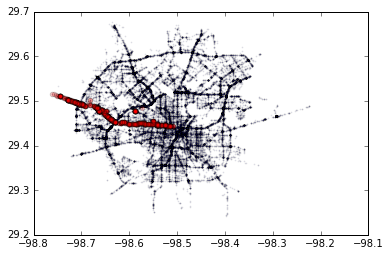

In [33]:
# plot culebra accidents over entire map, why is culebra so dangerous?
plt.scatter(df16['Crash Longitude'],df16['Crash Latitude'],marker='o', alpha=0.1, s=.5)
plt.scatter(culebra['Crash Longitude'],culebra['Crash Latitude'], c='r', alpha=0.2)
plt.show()

In [41]:
dangerous_rds = df16[~df16['Reported Road'].str.contains('IH0010|IH0035|IH0410|SL1604|US0281|SL0410|US0090|IH0037|FM1604|SH0151')]

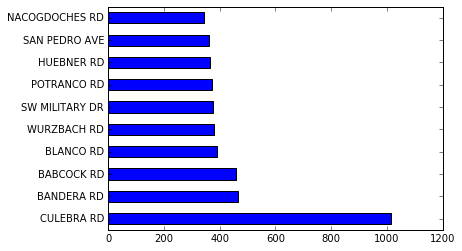

In [42]:
dangerous_rds['Reported Road'].value_counts()[:10].plot(kind='barh')

In [43]:
bandera = dangerous_rds[dangerous_rds['Reported Road']=='BANDERA RD']
babcock = dangerous_rds[dangerous_rds['Reported Road']=='BABCOCK RD']
blanco = dangerous_rds[dangerous_rds['Reported Road']=='BLANCO RD']
wurzbach = dangerous_rds[dangerous_rds['Reported Road']=='WURZBACH RD']
military = dangerous_rds[dangerous_rds['Reported Road']=='SW MILITARY DR']

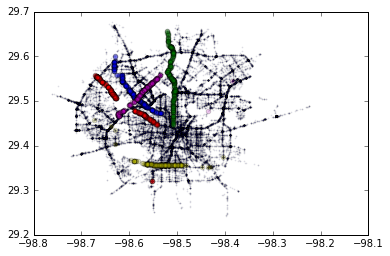

In [45]:
# plot culebra accidents over entire map, why is culebra so dangerous?
plt.scatter(df16['Crash Longitude'],df16['Crash Latitude'],marker='o', alpha=0.1, s=.5)
plt.scatter(bandera['Crash Longitude'],bandera['Crash Latitude'], c='r', alpha=0.2)
plt.scatter(babcock['Crash Longitude'],babcock['Crash Latitude'], c='b', alpha=0.2)
plt.scatter(blanco['Crash Longitude'],blanco['Crash Latitude'], c='g', alpha=0.2)
plt.scatter(wurzbach['Crash Longitude'],wurzbach['Crash Latitude'], c='m', alpha=0.2)
plt.scatter(military['Crash Longitude'],military['Crash Latitude'], c='y', alpha=0.2)
plt.show()

In [74]:
highway = df16['Reported Road'].str.contains('IH0010|IH0035|IH0410|SL1604|US0281|SL0410|US0090|IH0037|FM1604|SH0151').count()

In [79]:
nHighway = len(df16[~df16['Reported Road'].str.contains('IH0010|IH0035|IH0410|SL1604|US0281|SL0410|US0090|IH0037|FM1604|SH0151')])

In [94]:
from __future__ import division

total = highway+nHighway
highwayPct = highway/total*100
nHighwayPct = nHighway/total*100


In [96]:
print total
print "Highway Crash Pct ", highwayPct
print "Non Highway Crash Pct ", nHighwayPct

77108
Highway Crash Pct  59.2221299995
Non Highway Crash Pct  40.7778700005


In [99]:
result['Crash Month'] = result['Crash Date'].str[:2]

,Crash,Crash Date,Crash Time,Crash Alcohol Factor Flag,Crash Latitude,Crash Longitude,Reported Road,Reported Intersecting Road,Crash Contributing Factor List,Fatal Crashes,Incapacitating Injury Crashes,Non-Incapacitating Injury Crashes,Possible Injury Crashes,Non-Injury Crashes,Unknown Injury Crashes,Total Crashes,Year,Crash Month
0,13051703,01/01/2013,12:53 AM,Yes,29.587254,-98.377641,JUDSON RD,STAHL RD,HAD BEEN DRINKING,0,0,0,1,0,0,1,2013,01
1,13051750,01/01/2013,3:30 AM,Yes,29.594835,-98.401908,OCONNOR RD,RHYSE GROVE,DRIVER INATTENTION; FAILED TO CONTROL SPEED; H...,0,0,0,0,1,0,1,2013,01
2,13051751,01/01/2013,4:00 AM,Yes,29.578271,-98.441880,THOUSAND OAKS DR,JONES MALTSBERGER RD,DRIVER INATTENTION; FAILED TO YIELD ROW - PRIV...,0,0,0,0,1,0,1,2013,01
3,13051752,01/01/2013,4:56 AM,No,29.495557,-98.459284,N NEW BRAUNFELS AVE,EISENHAUER RD,DRIVER INATTENTION; FAILED TO CONTROL SPEED; F...,0,0,0,0,1,0,1,2013,01
4,13051753,01/01/2013,3:32 AM,No,29.510303,-98.397751,IH0035,WALZEM RD,DRIVER INATTENTION; FAILED TO CONTROL SPEED,0,0,0,1,0,0,1,2013,01
5,13051784,01/01/2013,4:45 AM,No,0.000000,0.000000,US0281N,ENCINO RIO,FATIGUED OR ASLEEP,0,0,0,0,1,0,1,2013,01
6,13051811,01/01/2013,8:30 AM,No,0.000000,0.000000,CHASE HILL,SECO CREEK,DRIVER INATTENTION; FAILED TO CONTROL SPEED,0,0,0,1,0,0,1,2013,01
7,13051814,01/01/2013,2:42 AM,Yes,29.573094,-98.378961,NACOGDOCHES RD,DREAMWOOD ST,CHANGED LANE WHEN UNSAFE; FOLLOWED TOO CLOSELY...,0,0,0,1,0,0,1,2013,01
8,13051836,01/01/2013,9:20 AM,No,29.404471,-98.446827,J ST,TWOHIG,ANIMAL ON ROAD- DOMESTIC,0,0,0,0,1,0,1,2013,01
9,13051839,01/01/2013,6:49 AM,No,29.543826,-98.386596,WURZBACH PKWY,WETMORE RD,FATIGUED OR ASLEEP,0,0,1,0,0,0,1,2013,01


In [106]:
result[(result['Crash Alcohol Factor Flag']=='Yes') & (result['Year']==2015)].groupby(['Crash Month']).size()

Crash Month
01    180
02    174
03    202
04    139
05    157
06    134
07    147
08    157
09    153
10    169
11    183
12    169
dtype: int64